# Forest Cover Type
[Kaggle link](https://www.kaggle.com/uciml/forest-cover-type-dataset)

In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

## EDA

In [2]:
df = pd.read_csv('covtype.csv')
df.describe(include='all')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
train.shape

(464809, 55)

In [15]:
test.shape

(116203, 55)

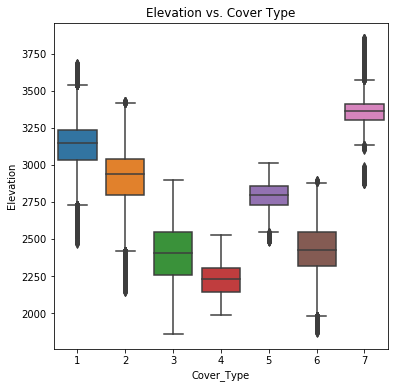

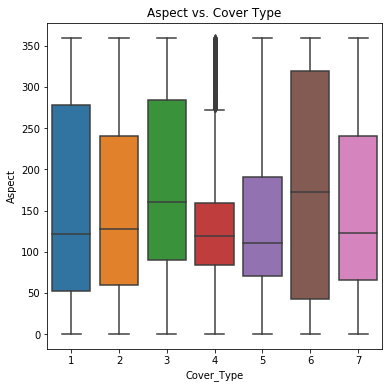

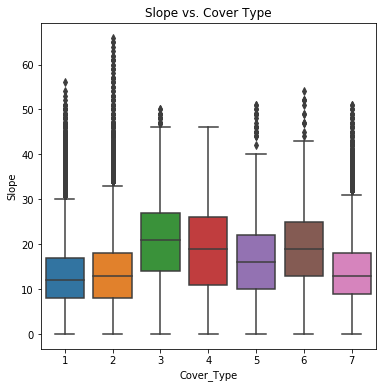

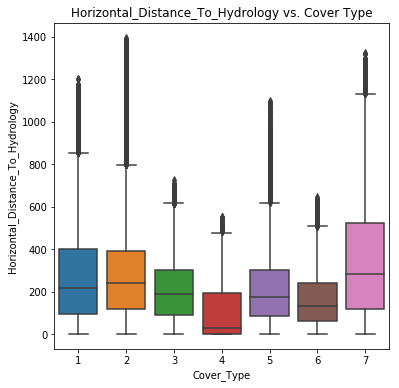

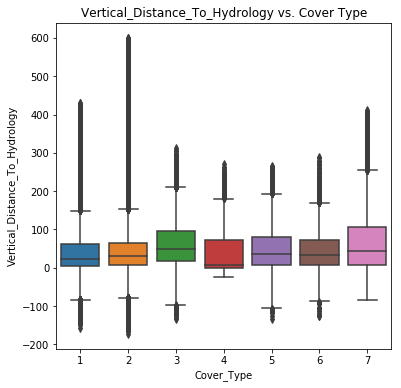

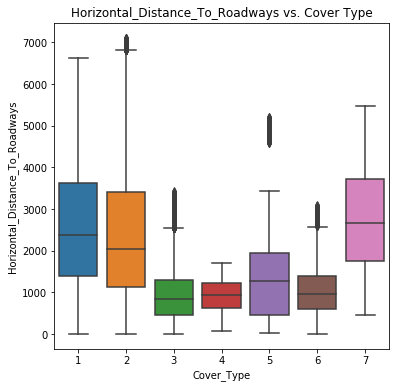

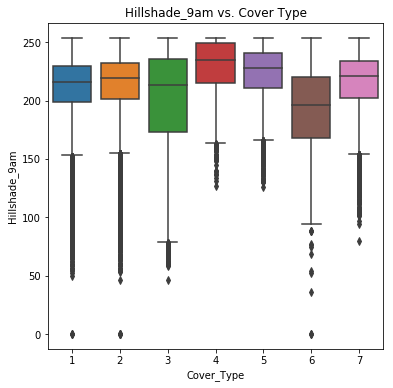

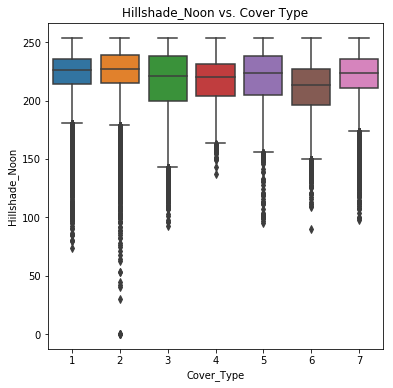

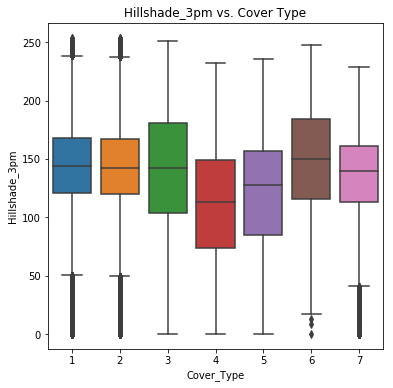

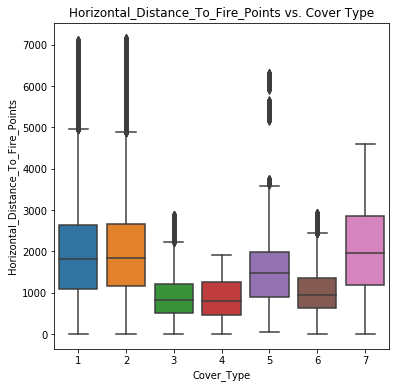

In [6]:
cont_vars = ['Elevation' , 'Aspect' , 'Slope', 'Horizontal_Distance_To_Hydrology' , 'Vertical_Distance_To_Hydrology' ,
                  'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

# boxplot of all continuous variables
for col in cont_vars:
    plt.figure(figsize=(6,6))
    plt.title(col + ' vs. Cover Type')
    sns.boxplot(x=df['Cover_Type'], y=df[col]);

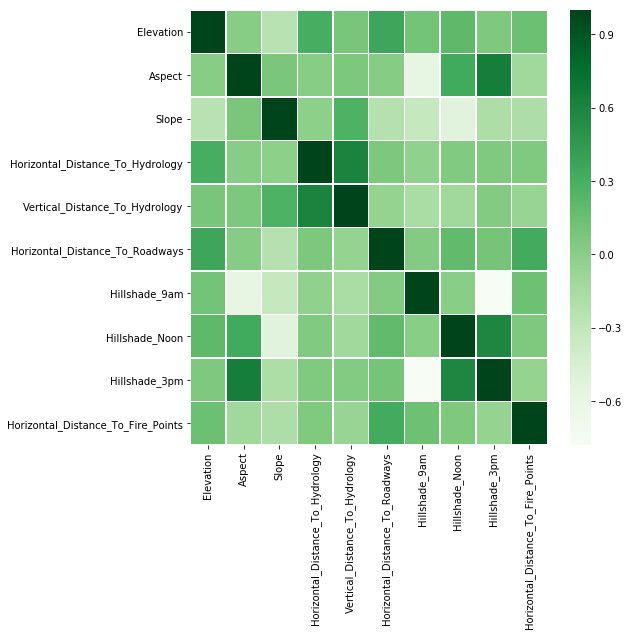

In [7]:
# Correlation plot (Pearson correlation)
plt.figure(figsize=(8,8))
sns.heatmap(train.iloc[:,0:10].corr(method='pearson'), annot=False, fmt='.2f', linewidths=0.5, cmap='Greens');

<Figure size 720x720 with 0 Axes>

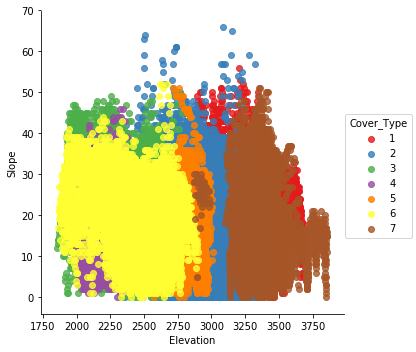

In [8]:
# Visualize elevation vs. slope
plt.figure(figsize=(10,10))
sns.lmplot(x='Elevation', y='Slope', data=train, fit_reg=False, hue='Cover_Type', legend=True, palette="Set1");

<Figure size 720x720 with 0 Axes>

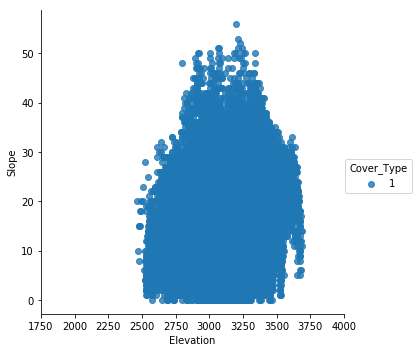

<Figure size 720x720 with 0 Axes>

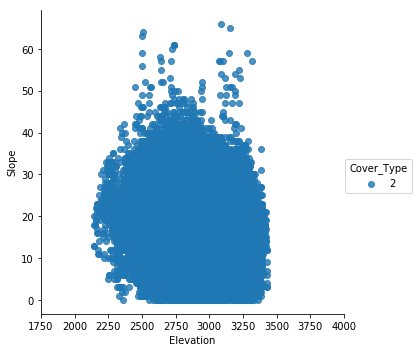

<Figure size 720x720 with 0 Axes>

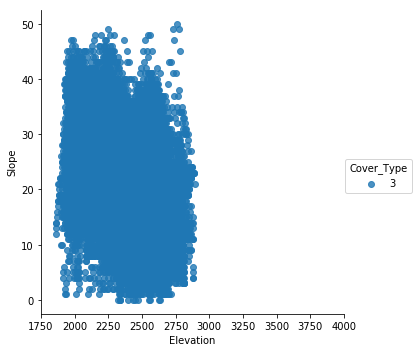

<Figure size 720x720 with 0 Axes>

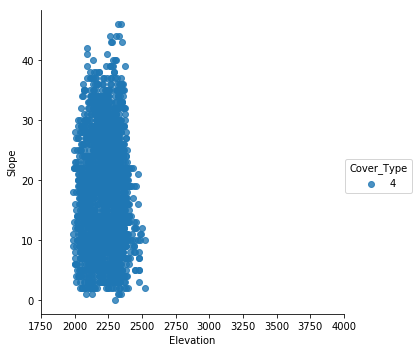

<Figure size 720x720 with 0 Axes>

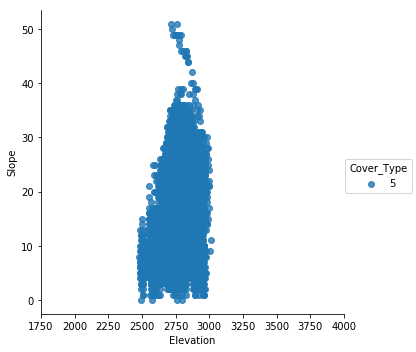

<Figure size 720x720 with 0 Axes>

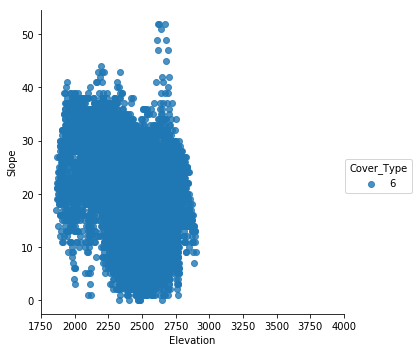

<Figure size 720x720 with 0 Axes>

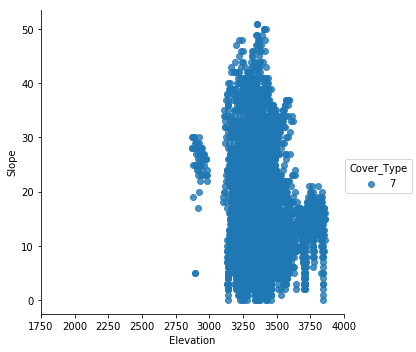

In [9]:
# Visualize elevation vs. slope (per cover type)

for i in range(1,8):
    plt.figure(figsize=(10,10))
    g = sns.lmplot(x='Elevation', y='Slope', data=train[train['Cover_Type']==i], fit_reg=False, hue='Cover_Type', legend=True);
    g.set(xlim=(1750, 4000))

## Modeling

In [17]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
new_features = model.transform(X_train)
print(new_features.shape)

(464809, 12)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Classifiers = [DecisionTreeClassifier(),
               LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
               RandomForestClassifier(n_estimators=200)]

In [30]:
# Run decision tree classifier, logistic regression and random forest
%%time

test_features = model.transform(X_test)

from sklearn.metrics import accuracy_score
Model = []
Accuracy = []
for clf in Classifiers:
    fit=clf.fit(new_features,y_train)
    pred=fit.predict(test_features)
    Model.append(clf.__class__.__name__)
    Accuracy.append(accuracy_score(test['Cover_Type'],pred))
    print('Accuracy of '+clf.__class__.__name__ +' is '+str(accuracy_score(test['Cover_Type'],pred)))

Accuracy of DecisionTreeClassifier is 0.9181690662031101
Accuracy of LogisticRegression is 0.5226457148266396
Accuracy of RandomForestClassifier is 0.9496226431331377


In [31]:
# Metrics

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[40072,  2407,     1,     0,    11,     3,    63],
       [ 1491, 54776,    93,     0,    70,    57,    13],
       [    1,   183,  6793,    22,     1,   121,     0],
       [    0,     0,    80,   426,     0,    20,     0],
       [   33,   507,    19,     0,  1432,     4,     0],
       [    1,   188,   223,    18,     1,  3058,     0],
       [  203,    20,     0,     0,     0,     0,  3792]])

NameError: name 'New_features' is not defined

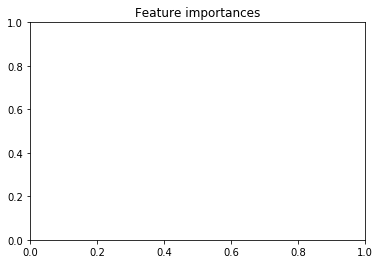

In [32]:
# Variable Importance

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(New_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(New_features.shape[1]), indices)
plt.xlim([-1, New_features.shape[1]])
plt.show()